In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/raw/data.csv")  # ← replace with the real data file
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [24]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [35]:
df.describe().T

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols].skew()


CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

In [26]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]
(missing / len(df)) * 100

TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

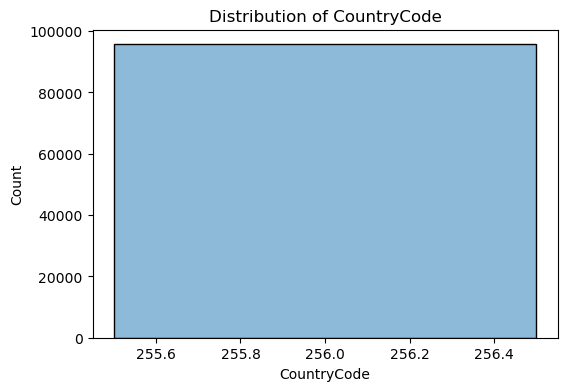

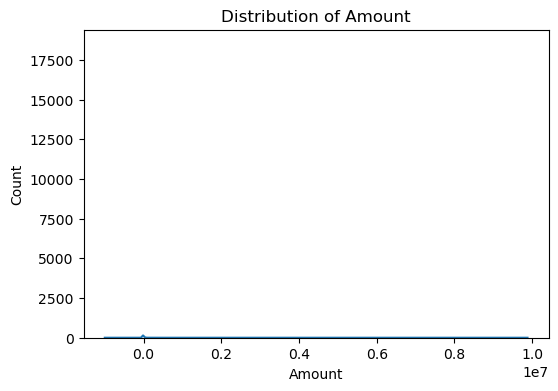

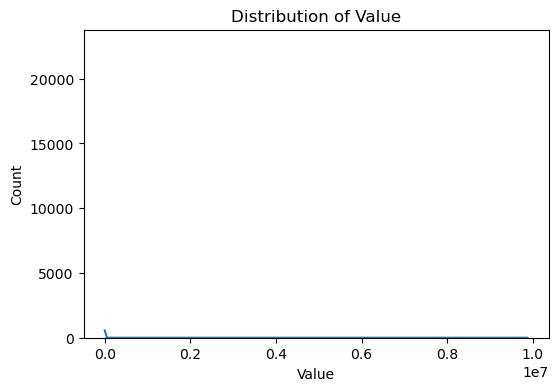

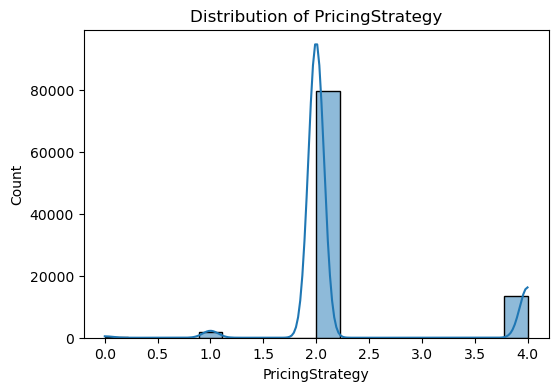

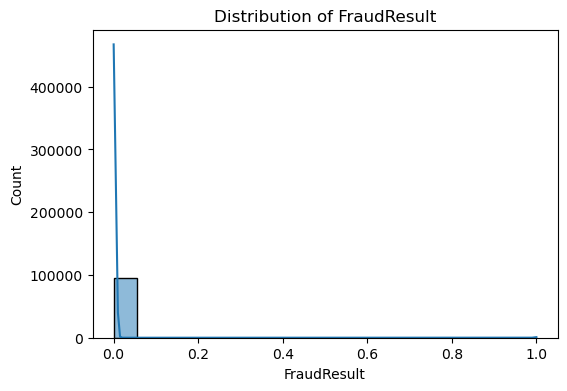

In [36]:
num_cols = ["CountryCode", "Amount", "Value", "PricingStrategy", "FraudResult"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


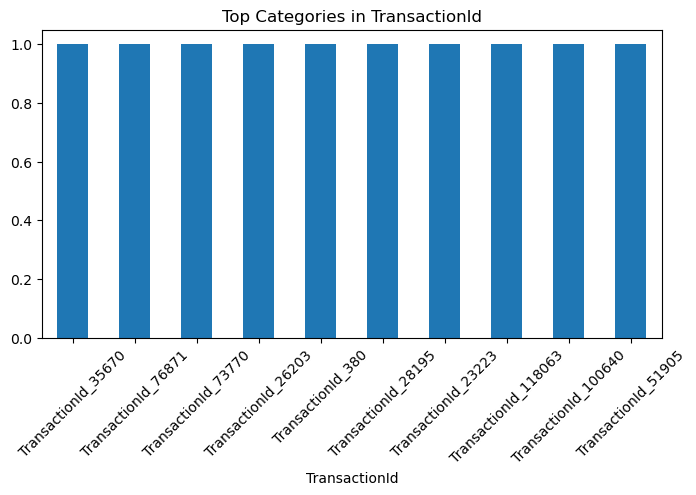

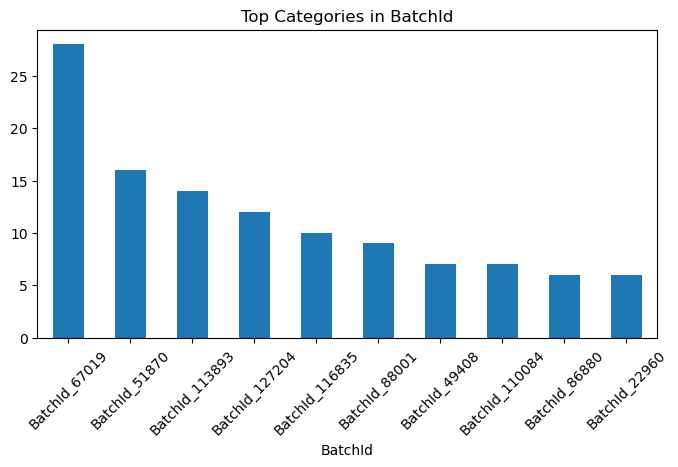

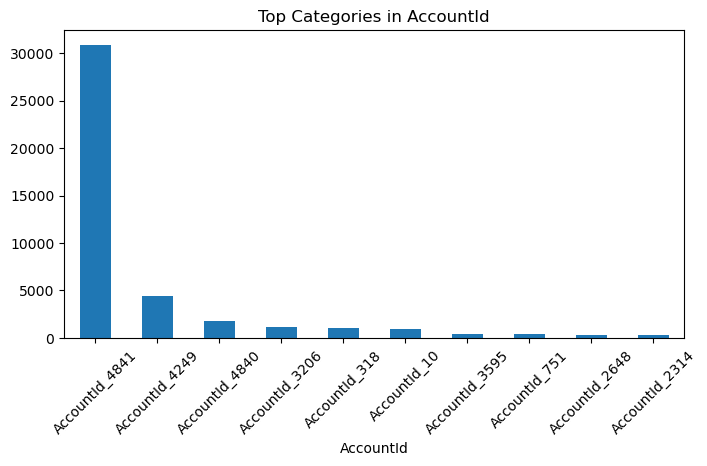

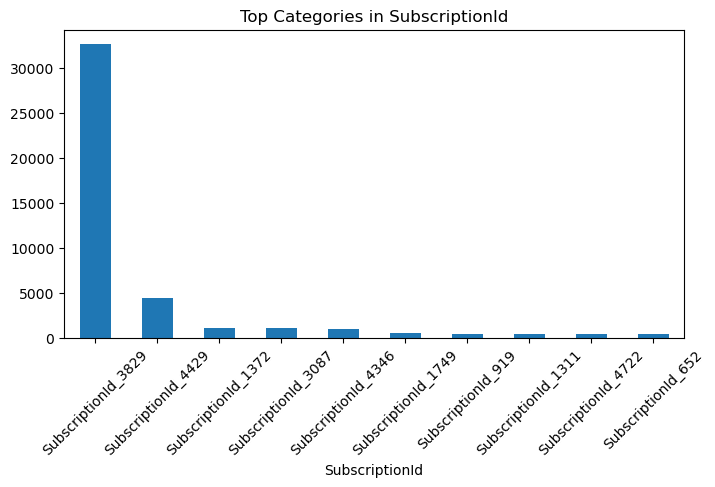

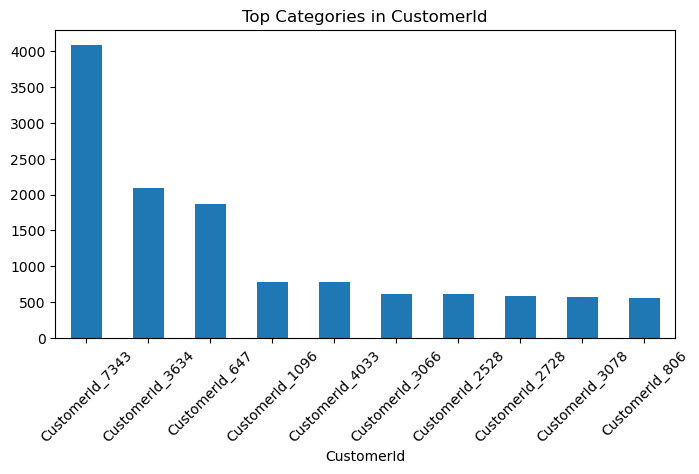

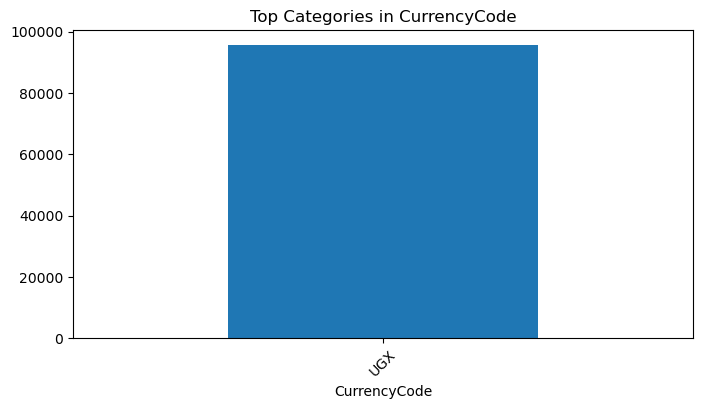

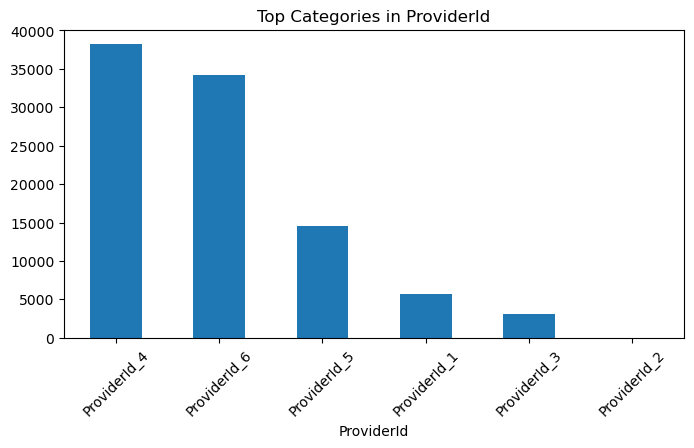

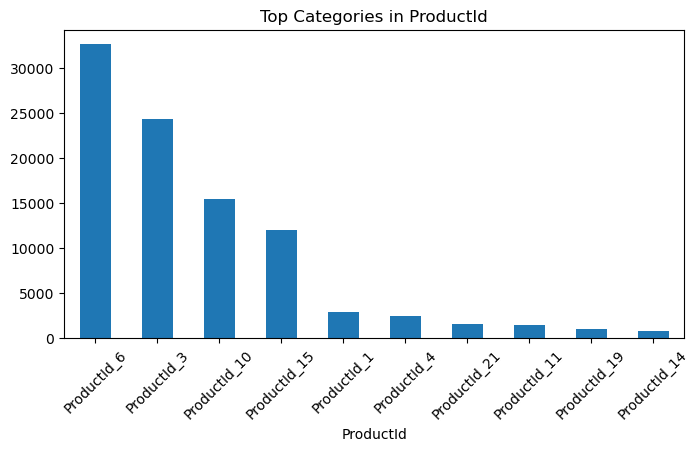

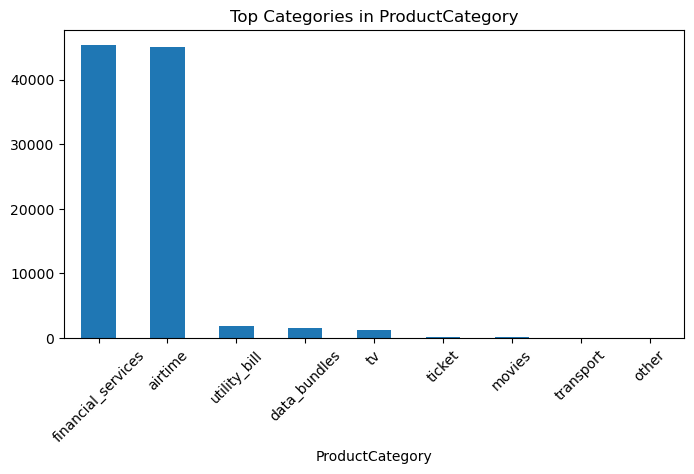

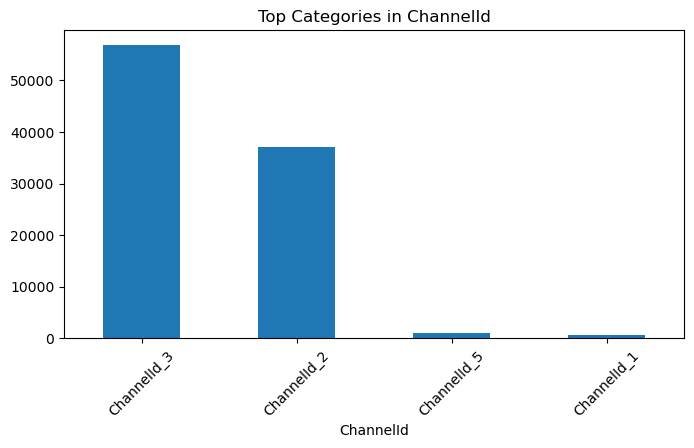

In [38]:
cat_cols = ["TransactionId", "BatchId", "AccountId", "SubscriptionId", "CustomerId",
            "CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()

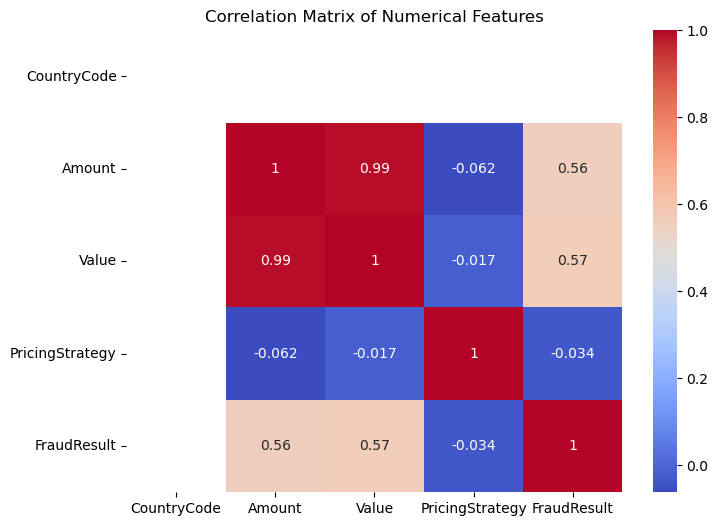

In [39]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [40]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percent
}).sort_values(by="Missing Percentage", ascending=False)

missing_df[missing_df["Missing Count"] > 0]


,Missing Count,Missing Percentage


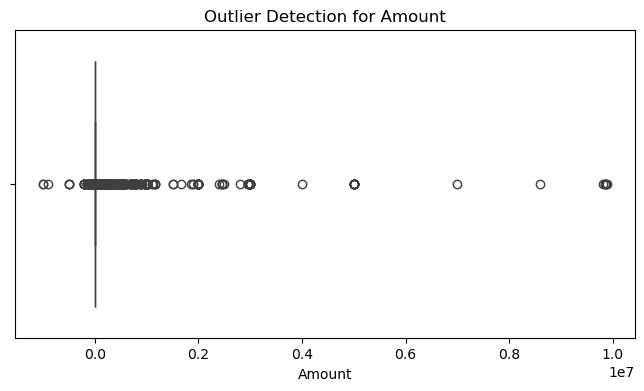

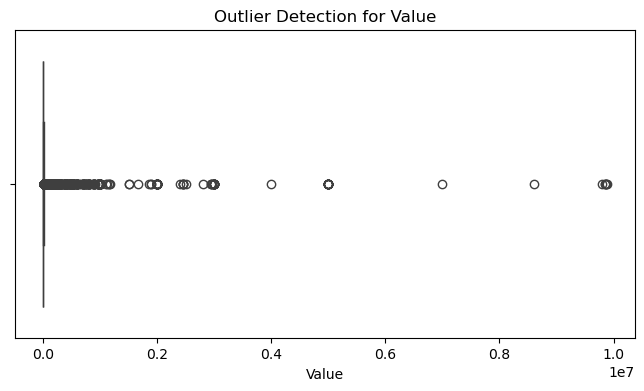

In [42]:
for col in ["Amount", "Value"]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()


# nsights from Exploratory Data Analysis (EDA)

1. **Transaction Amounts and Values are highly skewed**  
   - Most transactions are small in value, but a few extreme high-value transactions exist (`Amount` ranges from -1,000,000 to 9,880,000).  
   - This indicates potential outliers that may need special handling or transformation during modeling.

2. **PricingStrategy and CountryCode show low variance**  
   - `CountryCode` is constant at 256 → not useful for prediction.  
   - `PricingStrategy` is mostly concentrated around values 2 and 3, with very few other categories.

3. **FraudResult is extremely rare**  
   - Only ~0.2% of transactions are flagged as fraudulent, indicating class imbalance.  
   - May be useful as a feature but unlikely to be the target.

4. **Categorical features have clear dominant categories**  
   - Most frequent `ProductCategory` include `airtime`, `financial_services`, and `utility_bill`.  
   - `ChannelId` shows usage patterns (e.g., Web vs Mobile), which may help in behavioral feature engineering.

5. **No missing values in the dataset**  
   - All key columns are complete, so no imputation is required.  
   - This simplifies preprocessing and feature engineering.
